In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('pulsar_stars.csv')  # change filename if needed

# 1. View dimensions of dataset
print("Dataset shape:", df.shape)




Dataset shape: (17898, 9)


In [34]:
# 2. Preview the dataset
# type(df)
print(df.head())


      ip_mean     ip_std  ip_kurtosis  ip_skewness   dm_mean     dm_std  \
0  140.562500  55.683782    -0.234571    -0.699648  3.199833  19.110426   
1  102.507812  58.882430     0.465318    -0.515088  1.677258  14.860146   
2  103.015625  39.341649     0.323328     1.051164  3.121237  21.744669   
3  136.750000  57.178449    -0.068415    -0.636238  3.642977  20.959280   
4   88.726562  40.672225     0.600866     1.123492  1.178930  11.468720   

   dm_kurtosis  dm_skewness  target_class  
0     7.975532    74.242225             0  
1    10.576487   127.393580             0  
2     7.735822    63.171909             0  
3     6.896499    53.593661             0  
4    14.269573   252.567306             0  


In [4]:
# 3. View the column names
print("Original columns:", df.columns.tolist())

Original columns: [' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve', 'target_class']


In [5]:

# 4. Remove leading spaces in column names
df.columns = df.columns.str.strip()

In [6]:
# 5. View column names again
print("Cleaned columns:", df.columns.tolist())


Cleaned columns: ['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve', 'target_class']


In [9]:
# 6. Rename columns (if needed) - OPTIONAL
df.columns = [
    'ip_mean',         # Mean of the integrated profile
    'ip_std',          # Standard deviation of the integrated profile
    'ip_kurtosis',     # Excess kurtosis of the integrated profile
    'ip_skewness',     # Skewness of the integrated profile
    'dm_mean',         # Mean of the DM-SNR curve
    'dm_std',          # Standard deviation of the DM-SNR curve
    'dm_kurtosis',     # Excess kurtosis of the DM-SNR curve
    'dm_skewness',     # Skewness of the DM-SNR curve
    'target_class'     # target_class (already fine)
]

In [10]:
# 7. View renamed columns
print("Final columns:", df.columns.tolist())



Final columns: ['ip_mean', 'ip_std', 'ip_kurtosis', 'ip_skewness', 'dm_mean', 'dm_std', 'dm_kurtosis', 'dm_skewness', 'target_class']


In [11]:
# 8. Check distribution of target_class column
print("Class distribution:\n", df['target_class'].value_counts())



Class distribution:
 target_class
0    16259
1     1639
Name: count, dtype: int64


In [12]:
# 9. Percentage distribution of target_class
print("Percentage distribution:\n", df['target_class'].value_counts(normalize=True) * 100)



Percentage distribution:
 target_class
0    90.842552
1     9.157448
Name: proportion, dtype: float64


In [13]:
# 10. Dataset info summary
print("\nDataset Info:")
print(df.info())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ip_mean       17898 non-null  float64
 1   ip_std        17898 non-null  float64
 2   ip_kurtosis   17898 non-null  float64
 3   ip_skewness   17898 non-null  float64
 4   dm_mean       17898 non-null  float64
 5   dm_std        17898 non-null  float64
 6   dm_kurtosis   17898 non-null  float64
 7   dm_skewness   17898 non-null  float64
 8   target_class  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None


In [14]:
# 11. Check for missing values
print("\nMissing values:\n", df.isnull().sum())




Missing values:
 ip_mean         0
ip_std          0
ip_kurtosis     0
ip_skewness     0
dm_mean         0
dm_std          0
dm_kurtosis     0
dm_skewness     0
target_class    0
dtype: int64


In [15]:
# 12. Summary stats of numeric variables
print("\nSummary statistics:\n", df.describe())




Summary statistics:
             ip_mean        ip_std   ip_kurtosis   ip_skewness       dm_mean  \
count  17898.000000  17898.000000  17898.000000  17898.000000  17898.000000   
mean     111.079968     46.549532      0.477857      1.770279     12.614400   
std       25.652935      6.843189      1.064040      6.167913     29.472897   
min        5.812500     24.772042     -1.876011     -1.791886      0.213211   
25%      100.929688     42.376018      0.027098     -0.188572      1.923077   
50%      115.078125     46.947479      0.223240      0.198710      2.801839   
75%      127.085938     51.023202      0.473325      0.927783      5.464256   
max      192.617188     98.778911      8.069522     68.101622    223.392141   

             dm_std   dm_kurtosis   dm_skewness  target_class  
count  17898.000000  17898.000000  17898.000000  17898.000000  
mean      26.326515      8.303556    104.857709      0.091574  
std       19.470572      4.506092    106.514540      0.288432  
min       

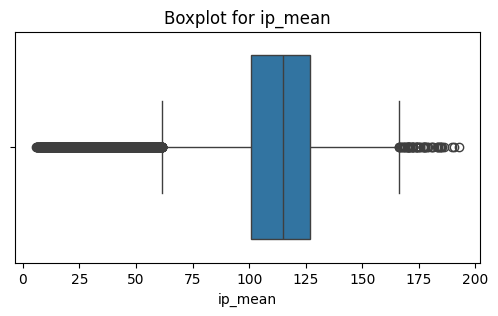

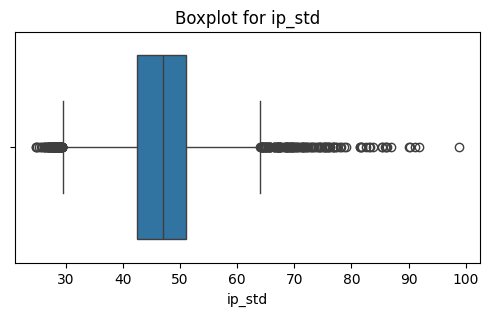

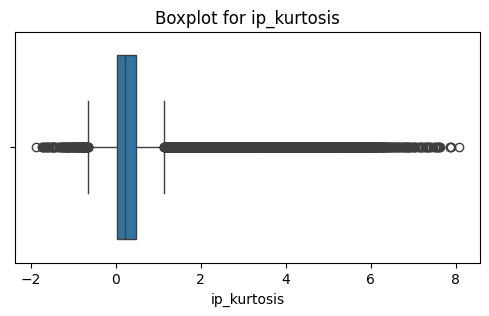

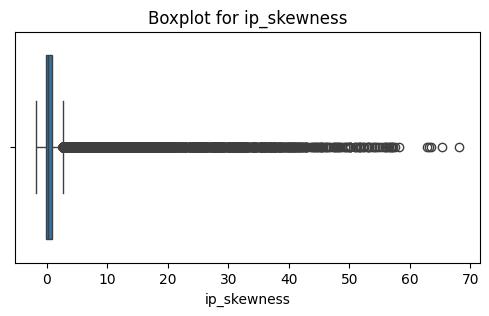

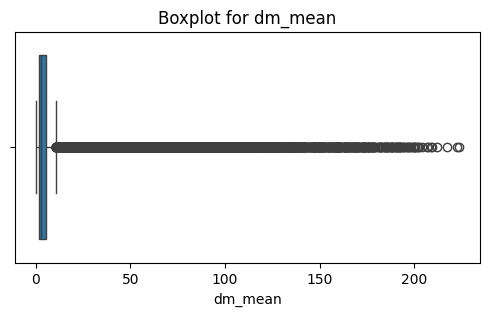

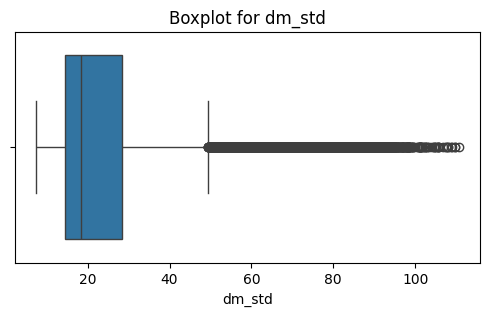

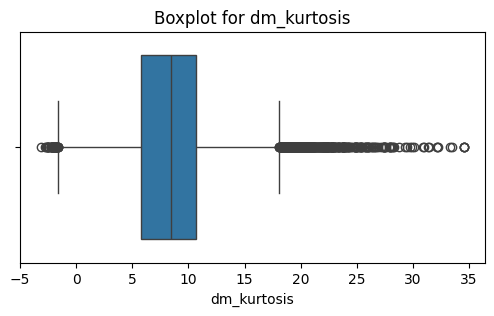

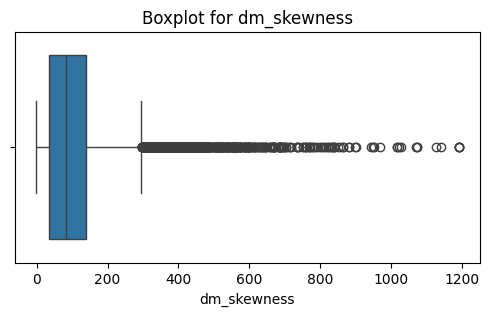

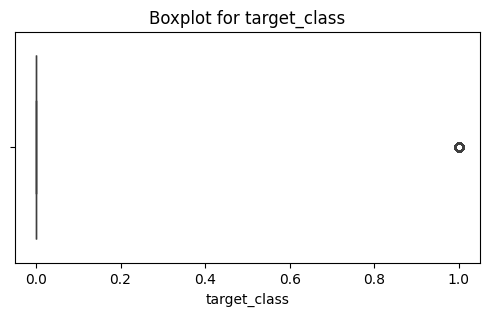

In [16]:
# 13. Boxplots to check for outliers
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [17]:

# 14. Split features (X) and target (y)
X = df.drop('target_class', axis=1)
y = df['target_class']

In [18]:
# 15. Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
# 16. Check the shape
print("X_train:", X_train.shape, "X_test:", X_test.shape)



X_train: (14318, 8) X_test: (3580, 8)


In [20]:
# 17. Feature scaling (important for SVMs!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SVM with different kernels and hyperparameters ###

# Helper function to train and evaluate
def run_svm_model(kernel, C_value):
    clf = SVC(kernel=kernel, C=C_value, gamma='auto')
    clf.fit(X_train_scaled, y_train)
    y_pred_train = clf.predict(X_train_scaled)
    y_pred_test = clf.predict(X_test_scaled)
    print(f"\nSVM with kernel='{kernel}', C={C_value}")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy :", accuracy_score(y_test, y_pred_test))



In [21]:
# 18. SVM with default params (kernel='rbf', C=1.0)
run_svm_model('rbf', 1.0)




SVM with kernel='rbf', C=1.0
Training Accuracy: 0.9789775108255343
Testing Accuracy : 0.979608938547486


In [22]:
# 19. SVM with rbf kernel, C=100
run_svm_model('rbf', 100.0)




SVM with kernel='rbf', C=100.0
Training Accuracy: 0.9833077245425339
Testing Accuracy : 0.982122905027933


In [23]:
# 20. SVM with rbf kernel, C=1000
run_svm_model('rbf', 1000.0)




SVM with kernel='rbf', C=1000.0
Training Accuracy: 0.9850537784606789
Testing Accuracy : 0.9801675977653631


In [24]:
# 21. SVM with linear kernel, C=1.0
run_svm_model('linear', 1.0)




SVM with kernel='linear', C=1.0
Training Accuracy: 0.9789775108255343
Testing Accuracy : 0.9787709497206704


In [25]:
# 22. SVM with linear kernel, C=100.0
run_svm_model('linear', 100.0)




SVM with kernel='linear', C=100.0
Training Accuracy: 0.9794664059226149
Testing Accuracy : 0.979050279329609


In [26]:
# 23. SVM with linear kernel, C=1000.0
run_svm_model('linear', 1000.0)





SVM with kernel='linear', C=1000.0
Training Accuracy: 0.9793965637658891
Testing Accuracy : 0.979050279329609


In [27]:
# 24. SVM with polynomial kernel, C=1.0
run_svm_model('poly', 1.0)




SVM with kernel='poly', C=1.0
Training Accuracy: 0.9775108255342925
Testing Accuracy : 0.9784916201117319


In [28]:
# 25. SVM with polynomial kernel, C=100.0
run_svm_model('poly', 100.0)



SVM with kernel='poly', C=100.0
Training Accuracy: 0.9801648274898729
Testing Accuracy : 0.9804469273743017


In [29]:

# 26. SVM with sigmoid kernel, C=1.0
run_svm_model('sigmoid', 1.0)



SVM with kernel='sigmoid', C=1.0
Training Accuracy: 0.8711412208408996
Testing Accuracy : 0.8751396648044693


In [30]:

# 27. SVM with sigmoid kernel, C=100.0
run_svm_model('sigmoid', 100.0)


SVM with kernel='sigmoid', C=100.0
Training Accuracy: 0.8711412208408996
Testing Accuracy : 0.8748603351955307
